<a href="https://colab.research.google.com/github/HEERHARISH1/ANO2_ML/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 2: Gradient Descent for Linear Regression**
This notebook implements Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-Batch Gradient Descent (MGD) for linear regression. We compare their convergence speed and final model parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## **Dataset Generation**
Generated a small synthetic dataset for testing our gradient descent implementations.

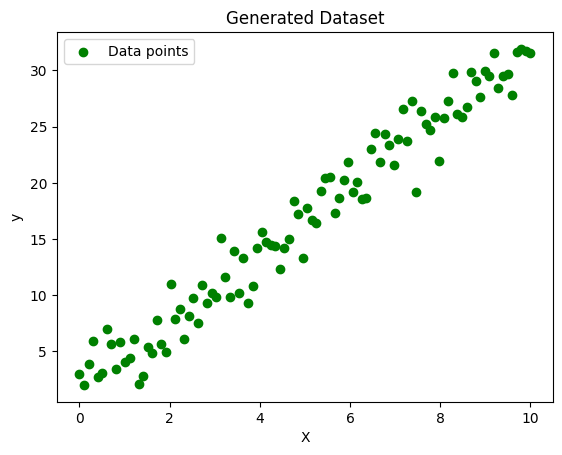

In [4]:

# Generate 100 random X values between 0 and 10
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100)  # Feature values

# Generate Y values using a linear function + noise
y = 3 * X + 2 + np.random.randn(100) * 2  # y = 3x + 2 + noise

# Plot the dataset
plt.scatter(X, y, label="Data points", color ='green')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Generated Dataset")
plt.show()


## **Gradient Descent Implementations**
Below are the implementations of different gradient descent algorithms.

In [5]:
# Step 2: Implement Gradient Descent Variants
def gradient_descent(X, y, lr=0.01, epochs=100, batch_size=None, momentum=0.0):
    w, b = np.random.randn(), np.random.randn()  # Initialize parameters
    v_w, v_b = 0, 0  # Initialize velocity for momentum
    n = len(X)
    loss_history = []

    for epoch in range(epochs):
        if batch_size is None:  # Batch Gradient Descent
            X_batch, y_batch = X, y
        else:  # Stochastic or Mini-Batch Gradient Descent
            indices = np.random.permutation(n)
            X, y = X[indices], y[indices]
            X_batch, y_batch = X[:batch_size], y[:batch_size]

        grad_w = -2 * np.mean(X_batch * (y_batch - (w * X_batch + b)))
        grad_b = -2 * np.mean(y_batch - (w * X_batch + b))

        # Apply momentum
        v_w = momentum * v_w + (1 - momentum) * grad_w
        v_b = momentum * v_b + (1 - momentum) * grad_b

        # Update parameters
        w -= lr * v_w
        b -= lr * v_b

        # Compute loss
        loss = np.mean((y - (w * X + b))**2)
        loss_history.append(loss)

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return w, b, loss_history

## **Stochastic Gradient Descent (SGD)**
**SGD updates parameters using a single randomly selected data point per iteration.**
- Faster updates, useful for large datasets.
- High variance in updates, leading to fluctuations.
- May not always converge to the optimal solution.

## **Batch Gradient Descent (BGD)**
**BGD updates parameters using the entire dataset at each iteration.**
- More stable convergence.
- Computationally expensive for large datasets.
- May get stuck in local minima.

# **Batch Gradient Descent**


In BGD, we compute the gradients using the entire dataset before updating the parameters.
Unlike SGD, which updates after each sample, BGD is more stable but can be slower.

# **Mini-batch Gradient Descent (MBGD)**
Approach:

Instead of one sample (SGD) or full dataset (BGD), we will take a small batch (e.g., 2-3 samples at a time).
Compute gradients for the batch and update weights.

Repeat for epochs, iterating over mini-batches.

## **Mini-Batch Gradient Descent (MGD)**
**MGD updates parameters using small batches of data points.**
- Balances between stability of BGD and speed of SGD.
- Helps in reducing fluctuations.
- Preferred for training deep learning models.

In [6]:
w_sgd, b_sgd, loss_sgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=1)  # Stochastic GD
w_mbgd, b_mbgd, loss_mbgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=10)  # Mini-Batch GD
w_bgd, b_bgd, loss_bgd = gradient_descent(X, y, lr=0.01, epochs=100, batch_size=None)  # Batch GD


Epoch 0: Loss = 385.4596
Epoch 10: Loss = 4.1502
Epoch 20: Loss = 9.7099
Epoch 30: Loss = 5.3349
Epoch 40: Loss = 3.9314
Epoch 50: Loss = 3.4325
Epoch 60: Loss = 3.4277
Epoch 70: Loss = 10.5061
Epoch 80: Loss = 5.0023
Epoch 90: Loss = 5.0816
Epoch 0: Loss = 89.9572
Epoch 10: Loss = 3.4314
Epoch 20: Loss = 3.4968
Epoch 30: Loss = 3.5638
Epoch 40: Loss = 3.7121
Epoch 50: Loss = 3.3940
Epoch 60: Loss = 3.3837
Epoch 70: Loss = 3.5267
Epoch 80: Loss = 3.5935
Epoch 90: Loss = 3.8155
Epoch 0: Loss = 62.5023
Epoch 10: Loss = 3.9920
Epoch 20: Loss = 3.9226
Epoch 30: Loss = 3.8598
Epoch 40: Loss = 3.8030
Epoch 50: Loss = 3.7515
Epoch 60: Loss = 3.7049
Epoch 70: Loss = 3.6627
Epoch 80: Loss = 3.6245
Epoch 90: Loss = 3.5900


ALL THREE COMPARISION

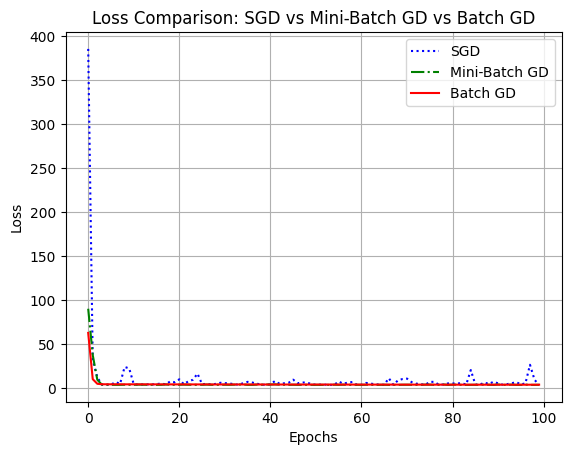

In [9]:
# Compare loss curves
plt.plot(loss_sgd, label="SGD", linestyle='dotted', color='blue')
plt.plot(loss_mbgd, label="Mini-Batch GD", linestyle='dashdot', color='green')
plt.plot(loss_bgd, label="Batch GD", linestyle='solid', color='red')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Comparison: SGD vs Mini-Batch GD vs Batch GD")
plt.grid(True)  # Added grid for better readability
plt.show()

# Second plot (Loss Convergence) - Removed as it was redundant
# You can add it back if you need it with different customizations

## **Hyperparameter Tuning: Learning Rate & Momentum**
We analyze how different learning rates and momentum values affect convergence.
- A **high learning rate** can lead to divergence.
- A **low learning rate** results in slow convergence.
- Momentum helps accelerate convergence and avoid local minima.

Epoch 0: Loss = 1117.9549
Epoch 10: Loss = 251.8692
Epoch 20: Loss = 70.1239
Epoch 30: Loss = 17.8613
Epoch 40: Loss = 7.4504
Epoch 50: Loss = 4.1277
Epoch 60: Loss = 3.5992
Epoch 70: Loss = 3.3992
Epoch 80: Loss = 3.3248
Epoch 90: Loss = 3.2711
Epoch 0: Loss = 884.3734
Epoch 10: Loss = 186.3839
Epoch 20: Loss = 35.3509
Epoch 30: Loss = 9.5025
Epoch 40: Loss = 5.0401
Epoch 50: Loss = 3.7279
Epoch 60: Loss = 3.4721
Epoch 70: Loss = 3.4460
Epoch 80: Loss = 3.4632
Epoch 90: Loss = 3.4355
Epoch 0: Loss = 336.8308
Epoch 10: Loss = 161.9910
Epoch 20: Loss = 26.9562
Epoch 30: Loss = 3.5593
Epoch 40: Loss = 6.6828
Epoch 50: Loss = 6.0278
Epoch 60: Loss = 4.2533
Epoch 70: Loss = 3.5664
Epoch 80: Loss = 3.5777
Epoch 90: Loss = 3.5668
Epoch 0: Loss = 13.2880
Epoch 10: Loss = 3.7094
Epoch 20: Loss = 3.7512
Epoch 30: Loss = 3.6040
Epoch 40: Loss = 4.1389
Epoch 50: Loss = 3.5566
Epoch 60: Loss = 3.6124
Epoch 70: Loss = 3.5965
Epoch 80: Loss = 3.6578
Epoch 90: Loss = 3.8228
Epoch 0: Loss = 104.4119
E

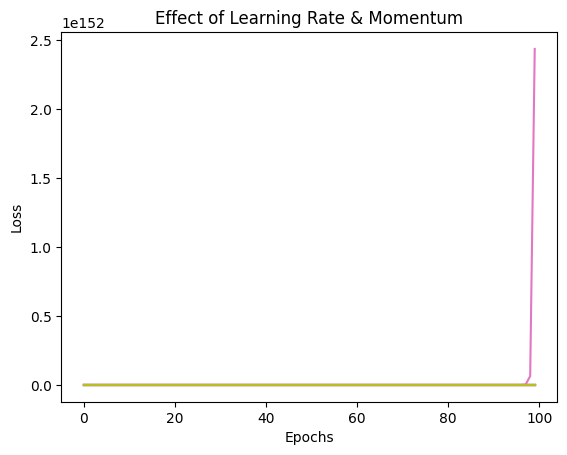

In [13]:
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

for lr in learning_rates:
    for mom in momentums:
        _, _, loss = gradient_descent(X, y, lr=lr, epochs=100, batch_size=10, momentum=mom)
        plt.plot(loss, label=f"LR={lr}, Momentum={mom}")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Effect of Learning Rate & Momentum")
plt.show()





Epoch 0: Loss = 124.0506
Epoch 10: Loss = 28.6459
Epoch 20: Loss = 8.9284
Epoch 30: Loss = 4.4981
Epoch 40: Loss = 3.6311
Epoch 50: Loss = 3.4366
Epoch 60: Loss = 3.4067
Epoch 70: Loss = 3.4098
Epoch 80: Loss = 3.3805
Epoch 90: Loss = 3.3855
Epoch 0: Loss = 141.0354
Epoch 10: Loss = 40.5464
Epoch 20: Loss = 12.5604
Epoch 30: Loss = 6.6776
Epoch 40: Loss = 4.8553
Epoch 50: Loss = 4.3129
Epoch 60: Loss = 4.2303
Epoch 70: Loss = 4.2401
Epoch 80: Loss = 4.2145
Epoch 90: Loss = 4.1510
Epoch 0: Loss = 268.1689
Epoch 10: Loss = 146.1150
Epoch 20: Loss = 33.3686
Epoch 30: Loss = 5.5862
Epoch 40: Loss = 6.2119
Epoch 50: Loss = 6.4496
Epoch 60: Loss = 5.4544
Epoch 70: Loss = 4.9265
Epoch 80: Loss = 4.8780
Epoch 90: Loss = 4.8630
Epoch 0: Loss = 63.5392
Epoch 10: Loss = 3.3014
Epoch 20: Loss = 3.3593
Epoch 30: Loss = 3.3249
Epoch 40: Loss = 3.3752
Epoch 50: Loss = 3.2893
Epoch 60: Loss = 3.2992
Epoch 70: Loss = 3.3202
Epoch 80: Loss = 3.3438
Epoch 90: Loss = 3.3150
Epoch 0: Loss = 88.6624
Epoch 1

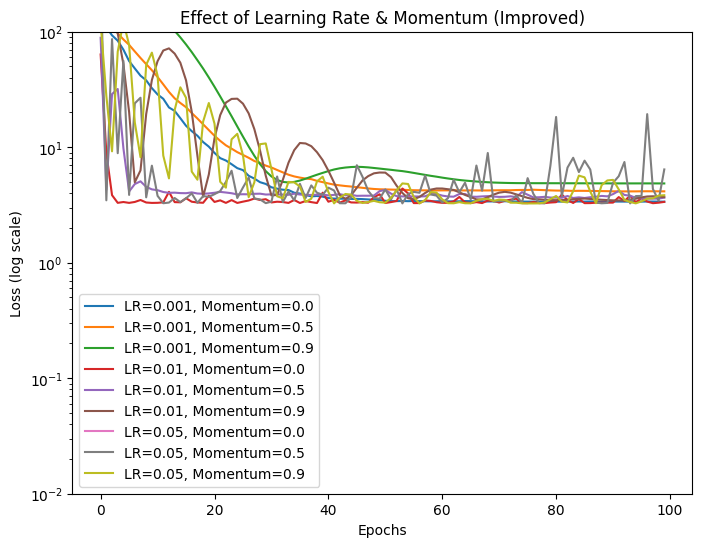

In [12]:
learning_rates = [0.001, 0.01, 0.05]  # Reduce highest LR
momentums = [0.0, 0.5, 0.9]

plt.figure(figsize=(8, 6))

for lr in learning_rates:
    for mom in momentums:
        _, _, loss = gradient_descent(X, y, lr=lr, epochs=100, batch_size=10, momentum=mom)
        plt.plot(loss, label=f"LR={lr}, Momentum={mom}")

plt.yscale("log")  # Log scale for better readability
plt.ylim(1e-2, 1e2)  # Set y-axis limit
plt.xlabel("Epochs")
plt.ylabel("Loss (log scale)")
plt.legend()
plt.title("Effect of Learning Rate & Momentum (Improved)")
plt.show()



## **Results & Observations**
We compare the loss curves and convergence speed of different gradient descent methods.

## **Conclusion**
- **Batch GD** is slow but stable.
- **SGD** is fast but noisy.
- **Mini-Batch GD** is a good balance between speed and stability.
- **Learning rate** and **momentum** significantly impact training efficiency.